In [1]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.api import VAR
from scipy.stats import pearsonr
import numpy as np

In [2]:
def parser(s):
    return datetime.strptime(s,'%Y-%m')

In [3]:
ice_cream_heater_df=pd.read_csv('ice_cream_vs_heater.csv',parse_dates=[0],index_col=0,squeeze=True)
ice_cream_heater_df

,heater,ice cream
Month,,
2004-01-01,27,13
2004-02-01,18,15
2004-03-01,14,16
2004-04-01,13,19
2004-05-01,13,21
...,...,...
2020-02-01,34,45
2020-03-01,25,44
2020-04-01,25,53


In [4]:
ice_cream_heater_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 198 entries, 2004-01-01 to 2020-06-01
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   heater     198 non-null    int64
 1   ice cream  198 non-null    int64
dtypes: int64(2)
memory usage: 4.6 KB


In [5]:
ice_cream_heater_df=ice_cream_heater_df.asfreq(pd.infer_freq(ice_cream_heater_df.index))
ice_cream_heater_df.info()#addressed time frequency

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 198 entries, 2004-01-01 to 2020-06-01
Freq: MS
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   heater     198 non-null    int64
 1   ice cream  198 non-null    int64
dtypes: int64(2)
memory usage: 4.6 KB


In [6]:
ice_cream_heater_df['ice cream'].iloc[0]

13

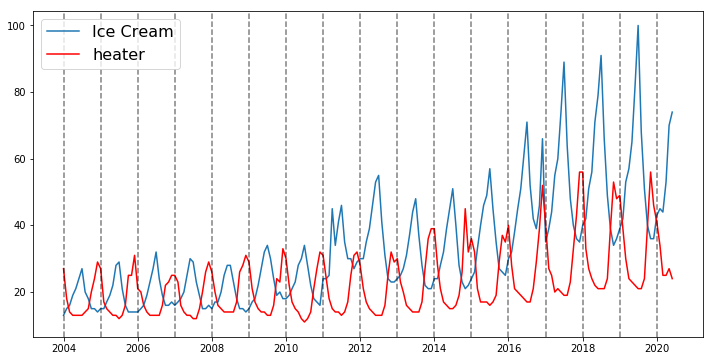

In [7]:
plt.figure(figsize=(12,6))
ice_cream,=plt.plot(ice_cream_heater_df['ice cream'])
heater,=plt.plot(ice_cream_heater_df['heater'],color='red')

for year in range(2004,2021):
    plt.axvline(datetime(year,1,1),linestyle='--',color='k',alpha=0.5)
plt.legend(['Ice Cream','heater'],fontsize=16)
plt.show()

In [8]:
avgs=ice_cream_heater_df.mean()
devs=ice_cream_heater_df.std()
avgs

heater       22.792929
ice cream    33.060606
dtype: float64

In [9]:
for col in ice_cream_heater_df.columns:
        ice_cream_heater_df[col]=np.log(ice_cream_heater_df[col])

In [10]:
#for col in ice_cream_heater_df.columns:
    #ice_cream_heater_df[col]=(ice_cream_heater_df[col]-avgs.loc[col])/devs.loc[col]

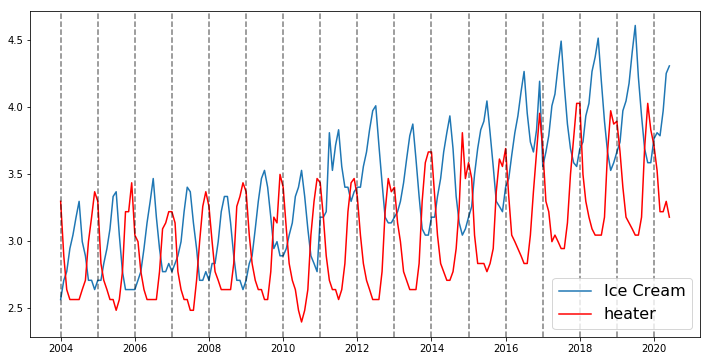

In [11]:
plt.figure(figsize=(12,6))
ice_cream,=plt.plot(ice_cream_heater_df['ice cream'])
heater,=plt.plot(ice_cream_heater_df['heater'],color='red')

for year in range(2004,2021):
    plt.axvline(datetime(year,1,1),linestyle='--',color='k',alpha=0.5)
plt.legend(['Ice Cream','heater'],fontsize=16)
plt.show()

In [12]:
ice_cream_heater_df=ice_cream_heater_df.diff().dropna()
ice_cream_heater_df

,heater,ice cream
Month,,
2004-02-01,-0.405465,0.143101
2004-03-01,-0.251314,0.064539
2004-04-01,-0.074108,0.171850
2004-05-01,0.000000,0.100083
2004-06-01,0.000000,0.133531
...,...,...
2020-02-01,-0.187212,0.045462
2020-03-01,-0.307485,-0.022473
2020-04-01,0.000000,0.186102


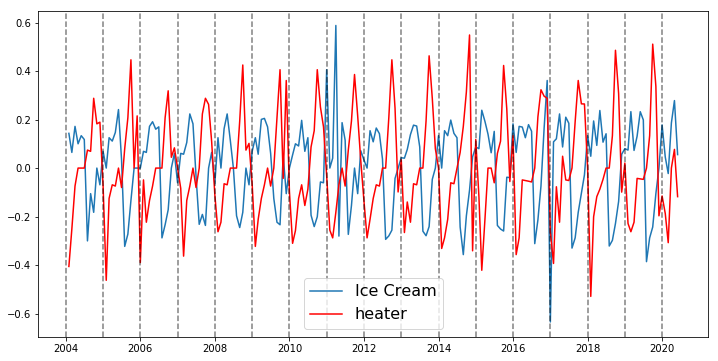

In [13]:
plt.figure(figsize=(12,6))
ice_cream,=plt.plot(ice_cream_heater_df['ice cream'])
heater,=plt.plot(ice_cream_heater_df['heater'],color='red')

for year in range(2004,2021):
    plt.axvline(datetime(year,1,1),linestyle='--',color='k',alpha=0.5)
plt.legend(['Ice Cream','heater'],fontsize=16)
plt.show()

In [14]:
#This is how we remove increasing volatility
annual_volatility = ice_cream_heater_df.groupby(ice_cream_heater_df.index.year).std()
annual_volatility

,heater,ice cream
Month,,
2004,0.198659,0.153154
2005,0.222802,0.167777
2006,0.185074,0.164300
2007,0.185830,0.152517
2008,0.184189,0.148989
2009,0.217116,0.155782
2010,0.215575,0.142142
2011,0.198166,0.256481
2012,0.209604,0.168579


In [15]:
ice_cream_heater_df['ice_cream_annual_vol'] = ice_cream_heater_df.index.map(lambda d: annual_volatility.loc[d.year, 'ice cream'])
ice_cream_heater_df['heater_annual_vol'] = ice_cream_heater_df.index.map(lambda d: annual_volatility.loc[d.year, 'heater'])
ice_cream_heater_df

,heater,ice cream,ice_cream_annual_vol,heater_annual_vol
Month,,,,
2004-02-01,-0.405465,0.143101,0.153154,0.198659
2004-03-01,-0.251314,0.064539,0.153154,0.198659
2004-04-01,-0.074108,0.171850,0.153154,0.198659
2004-05-01,0.000000,0.100083,0.153154,0.198659
2004-06-01,0.000000,0.133531,0.153154,0.198659
...,...,...,...,...
2020-02-01,-0.187212,0.045462,0.112009,0.135711
2020-03-01,-0.307485,-0.022473,0.112009,0.135711
2020-04-01,0.000000,0.186102,0.112009,0.135711


In [16]:
#ice_cream_heater_df['ice cream'] = ice_cream_heater_df['ice cream'] / ice_cream_heater_df['ice_cream_annual_vol']
#ice_cream_heater_df['heater'] = ice_cream_heater_df['heater'] / ice_cream_heater_df['heater_annual_vol']
#End of scaled volatiliy process

In [17]:
#Remove Seasonality
month_avgs = ice_cream_heater_df.groupby(ice_cream_heater_df.index.month).mean()
print(month_avgs)

         heater  ice cream  ice_cream_annual_vol  heater_annual_vol
Month                                                              
1     -0.060563   0.040910              0.178281           0.211821
2     -0.285179   0.061123              0.176803           0.211046
3     -0.243389   0.107642              0.176803           0.211046
4     -0.134773   0.171712              0.176803           0.211046
5     -0.043974   0.149640              0.176803           0.211046
6     -0.039612   0.150672              0.176803           0.211046
7     -0.038182   0.104151              0.180853           0.215755
8      0.027527  -0.269570              0.180853           0.215755
9      0.175738  -0.244913              0.180853           0.215755
10     0.392945  -0.188853              0.180853           0.215755
11     0.219875  -0.031991              0.180853           0.215755
12     0.068907   0.018122              0.180853           0.215755


In [18]:
ice_cream_heater_df['ice_cream_month_avg'] = ice_cream_heater_df.index.map(lambda d: month_avgs.loc[d.month, 'ice cream'])
ice_cream_heater_df['heater_month_avg'] = ice_cream_heater_df.index.map(lambda d: month_avgs.loc[d.month, 'heater'])

In [19]:
ice_cream_heater_df

,heater,ice cream,ice_cream_annual_vol,heater_annual_vol,ice_cream_month_avg,heater_month_avg
Month,,,,,,
2004-02-01,-0.405465,0.143101,0.153154,0.198659,0.061123,-0.285179
2004-03-01,-0.251314,0.064539,0.153154,0.198659,0.107642,-0.243389
2004-04-01,-0.074108,0.171850,0.153154,0.198659,0.171712,-0.134773
2004-05-01,0.000000,0.100083,0.153154,0.198659,0.149640,-0.043974
2004-06-01,0.000000,0.133531,0.153154,0.198659,0.150672,-0.039612
...,...,...,...,...,...,...
2020-02-01,-0.187212,0.045462,0.112009,0.135711,0.061123,-0.285179
2020-03-01,-0.307485,-0.022473,0.112009,0.135711,0.107642,-0.243389
2020-04-01,0.000000,0.186102,0.112009,0.135711,0.171712,-0.134773


In [20]:
ice_cream_heater_df['ice cream'] = ice_cream_heater_df['ice cream'] - ice_cream_heater_df['ice_cream_month_avg']
ice_cream_heater_df['heater'] = ice_cream_heater_df['heater'] - ice_cream_heater_df['heater_month_avg']

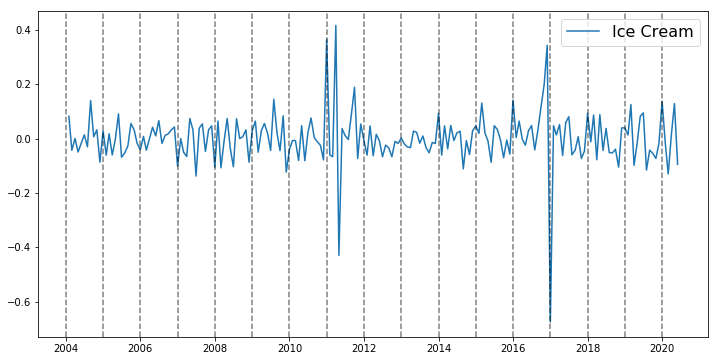

In [21]:
plt.figure(figsize=(12,6))
ice_cream,=plt.plot(ice_cream_heater_df['ice cream'])
for year in range(2004,2021):
    plt.axvline(datetime(year,1,1),linestyle='--',color='k',alpha=0.5)
plt.legend(['Ice Cream'],fontsize=16)
plt.show()

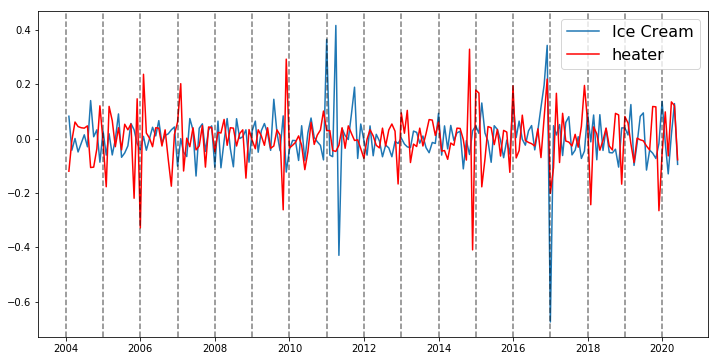

In [22]:
plt.figure(figsize=(12,6))
ice_cream,=plt.plot(ice_cream_heater_df['ice cream'])
heater,=plt.plot(ice_cream_heater_df['heater'],color='red')

for year in range(2004,2021):
    plt.axvline(datetime(year,1,1),linestyle='--',color='k',alpha=0.5)
plt.legend(['Ice Cream','heater'],fontsize=16)
plt.show()

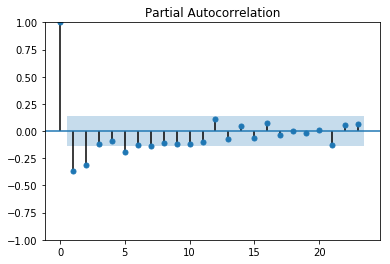

In [23]:
plot_pacf(ice_cream_heater_df['heater'],method='ywm')
plt.show()#So Consider an AR2

In [24]:
#Correlation between 'heater' and lagged 'ice cream'
for lag in range(1,14):
    heater_series=ice_cream_heater_df['heater'].iloc[lag:]
    lagged_ice_cream_series=ice_cream_heater_df['ice cream'].iloc[:-lag]
    print('Lag:%s'%lag)
    print(pearsonr(heater_series,lagged_ice_cream_series))
    print('-------')

Lag:1
(-0.005461051337907006, 0.9394459464144959)
-------
Lag:2
(-0.11000898919929093, 0.1257778571389425)
-------
Lag:3
(0.01915769330353171, 0.7909049223394332)
-------
Lag:4
(0.02306948988032918, 0.750142060535009)
-------
Lag:5
(0.010813214519891791, 0.8816654927629958)
-------
Lag:6
(0.024725463938753075, 0.7342168843882156)
-------
Lag:7
(-0.027758915969112643, 0.7038128632951631)
-------
Lag:8
(0.05663954819850932, 0.43885917610129843)
-------
Lag:9
(-0.04289676046018159, 0.5588724154410343)
-------
Lag:10
(0.025018800557048887, 0.7339422618969932)
-------
Lag:11
(-0.08642748351761505, 0.24081030335878462)
-------
Lag:12
(-0.08692800194287426, 0.2393697944785956)
-------
Lag:13
(0.2143024020552667, 0.003487486898967932)
-------


In [25]:
ice_cream_heater_df=ice_cream_heater_df[['ice cream','heater']]
ice_cream_heater_df

,ice cream,heater
Month,,
2004-02-01,0.081978,-0.120286
2004-03-01,-0.043104,-0.007925
2004-04-01,0.000138,0.060665
2004-05-01,-0.049556,0.043974
2004-06-01,-0.017141,0.039612
...,...,...
2020-02-01,-0.015661,0.097967
2020-03-01,-0.130115,-0.064095
2020-04-01,0.014390,0.134773


In [26]:
model=VAR(ice_cream_heater_df)

In [27]:
model_fit=model.fit(1)

In [28]:
model_fit.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 07, Oct, 2022
Time:                     22:10:58
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -9.50215
Nobs:                     196.000    HQIC:                  -9.56187
Log likelihood:           390.821    FPE:                6.75602e-05
AIC:                     -9.60250    Det(Omega_mle):     6.55385e-05
--------------------------------------------------------------------
Results for equation ice cream
                  coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------
const               -0.000234         0.006528           -0.036           0.971
L1.ice cream        -0.312293         0.068187           -4.580           0.000
L1.heater           -0.081933         0.068810           -1.

In [29]:
Forecas_res=model_fit.forecast(ice_cream_heater_df.values[-20:],5)#gdp_diff_df.values means converting it into numpy array,we are pass in 4 values,which is quarterly data. so, it would be like a year
Forecas_res

array([[ 0.03587057,  0.02826301],
       [-0.01375184, -0.00916719],
       [ 0.00481165,  0.00393686],
       [-0.00205925, -0.00063098],
       [ 0.00046074,  0.00095464]])

In [30]:
ice_cream_heater_df[-2:]

,ice cream,heater
Month,,
2020-05-01,0.128564,0.120935
2020-06-01,-0.095103,-0.078171


In [31]:
equation_heater=0.000754*+(-0.09510252*0.016618 )+(-0.372124*-0.078171)
equation_heater

0.029088113572087276

In [32]:
equation_ice_cream=-0.000234+(-0.312293*-0.095103)+(-0.081933*-0.078171)
equation_ice_cream

0.035870785722

In [33]:
index=pd.date_range('2020-06-01',periods=5,freq="MS")
forecast_df = pd.DataFrame(Forecas_res, index=index,
                          columns=['ice cream','heater'])
ice_cream_heater_df=ice_cream_heater_df.append(forecast_df)
ice_cream_heater_df

,ice cream,heater
2004-02-01,0.081978,-0.120286
2004-03-01,-0.043104,-0.007925
2004-04-01,0.000138,0.060665
2004-05-01,-0.049556,0.043974
2004-06-01,-0.017141,0.039612
...,...,...
2020-06-01,0.035871,0.028263
2020-07-01,-0.013752,-0.009167
2020-08-01,0.004812,0.003937
2020-09-01,-0.002059,-0.000631


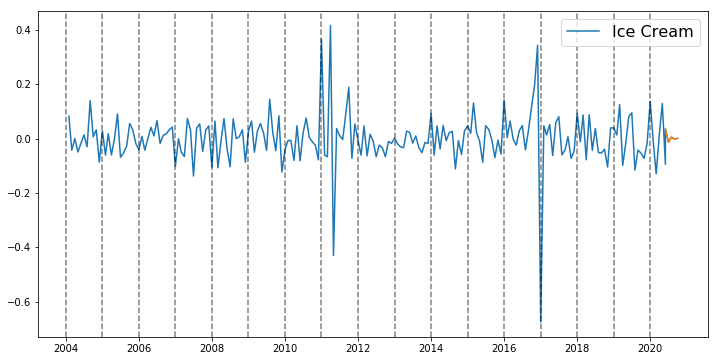

In [34]:
plt.figure(figsize=(12,6))
plt.plot(ice_cream_heater_df['ice cream'])
plt.plot(ice_cream_heater_df['ice cream'][-5:])
for year in range(2004,2021):
    plt.axvline(datetime(year,1,1),linestyle='--',color='k',alpha=0.5)
plt.legend(['Ice Cream'],fontsize=16)
plt.show()